In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump

# library from preprocessing Module.
from sklearn.preprocessing import  OneHotEncoder
from sklearn.preprocessing import StandardScaler, OrdinalEncoder


# library from model selection Module
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import  DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
pd.set_option("display.max_columns", None)

In [72]:
df = pd.read_csv('Customer-Churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [36]:
# For this project, we won't use the customerID column, so let's drop it!
df.drop(columns = ['customerID'], axis=1, inplace=True)


In [73]:
cols = ['gender','Partner','Dependents','PhoneService',	'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','TotalCharges','PaperlessBilling','PaymentMethod']

ord = OrdinalEncoder()
ord.fit(df[cols])
df[cols] = ord.transform(df[cols])
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,No
1,5575-GNVDE,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,No
2,3668-QPYBK,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,Yes
3,7795-CFOCW,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,No
4,9237-HQITU,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,Yes
5,9305-CDSKC,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,6104.0,Yes
6,1452-KIOVK,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1550.0,No
7,6713-OKOMC,0.0,0,0.0,0.0,10,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,29.75,2609.0,No
8,7892-POOKP,0.0,0,1.0,0.0,28,1.0,2.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,1.0,2.0,104.80,2646.0,Yes
9,6388-TABGU,1.0,0,0.0,1.0,62,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,56.15,3022.0,No


In [38]:
Churn_ohe = OneHotEncoder(drop='first', sparse=False, dtype=np.int32)
Churn_dummies = Churn_ohe.fit_transform(df[['Churn']])
df.drop(columns=['Churn'],inplace=True)


In [39]:
df = pd.concat([df, pd.DataFrame(Churn_dummies)], axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,0
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1


In [40]:
df.rename(columns={0:"Churn"}, inplace=True)

In [41]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1597.0,0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,5698.0,0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,2994.0,0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,2660.0,1


In [42]:
df.head().T

,0,1,2,3,4
gender,0.00,1.00,1.00,1.0,0.0
SeniorCitizen,0.00,0.00,0.00,0.0,0.0
Partner,1.00,0.00,0.00,0.0,0.0
Dependents,0.00,0.00,0.00,0.0,0.0
tenure,1.00,34.00,2.00,45.0,2.0
PhoneService,0.00,1.00,1.00,0.0,1.0
MultipleLines,1.00,0.00,0.00,1.0,0.0
InternetService,0.00,0.00,0.00,0.0,1.0
OnlineSecurity,0.00,2.00,2.00,2.0,0.0
OnlineBackup,2.00,0.00,2.00,0.0,0.0


In [43]:
df.to_csv('cleaned_Dataset.csv',index=None)

In [44]:
# Printing unique value counts for each variable
for i in df.columns:
    print(f"----{i}----\n")
    print(df[i].value_counts())
    print('='*35)

----gender----

1.0    3555
0.0    3488
Name: gender, dtype: int64
----SeniorCitizen----

0    5901
1    1142
Name: SeniorCitizen, dtype: int64
----Partner----

0.0    3641
1.0    3402
Name: Partner, dtype: int64
----Dependents----

0.0    4933
1.0    2110
Name: Dependents, dtype: int64
----tenure----

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
----PhoneService----

1.0    6361
0.0     682
Name: PhoneService, dtype: int64
----MultipleLines----

0.0    3390
2.0    2971
1.0     682
Name: MultipleLines, dtype: int64
----InternetService----

1.0    3096
0.0    2421
2.0    1526
Name: InternetService, dtype: int64
----OnlineSecurity----

0.0    3498
2.0    2019
1.0    1526
Name: OnlineSecurity, dtype: int64
----OnlineBackup----

0.0    3088
2.0    2429
1.0    1526
Name: OnlineBackup, dtype: int64
----DeviceProtection----

0.0    3095
2.0    2422
1.0    1526
Name: DeviceProtection, dtype:

In [45]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=1)
print('X_train:',len(X_train))
print('X_test:',len(X_test))
print('y_train',len(y_train))
print('y_test',len(y_test))

X_train: 4930
X_test: 2113
y_train 4930
y_test 2113


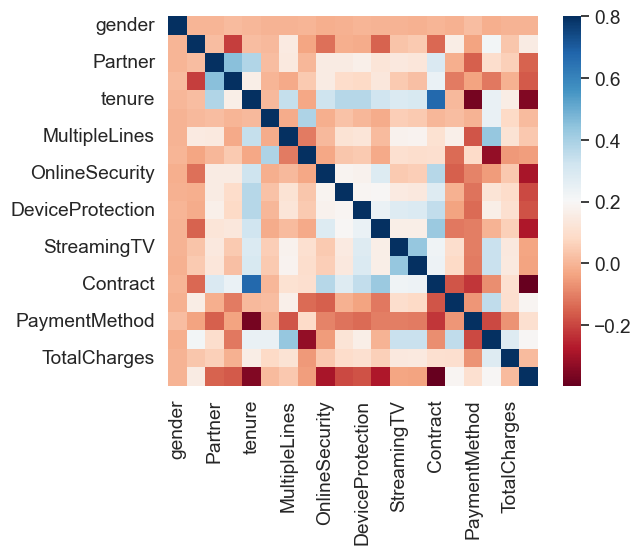

In [46]:
#correlation matrix
corrmat = df.corr()
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdBu");


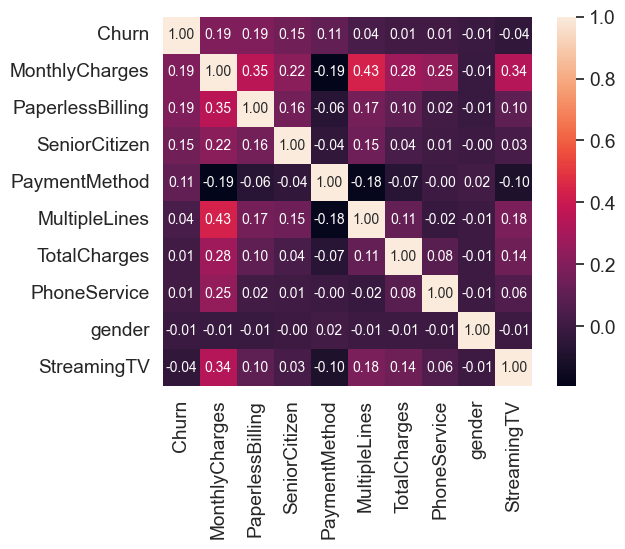

In [47]:
k = 10 
cols = corrmat.nlargest(k, 'Churn')['Churn'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values);

In [48]:
# Let's standardize tenure, MonthlyCharges and TotalCharges
num_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()

X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

#### Logistic Regression

In [49]:
model = make_pipeline(StandardScaler(),LogisticRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test,y_test)
print("Logistic Regression accuracy: ",accuracy)


Logistic Regression accuracy:  0.8097491717936584


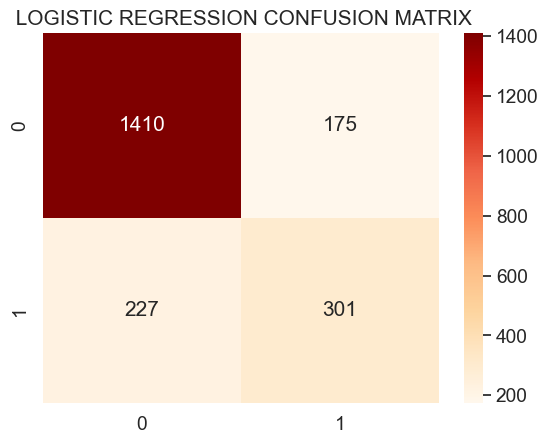

In [50]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d",cmap='OrRd')
plt.title(" LOGISTIC REGRESSION CONFUSION MATRIX");

In [51]:
print("classification_report")
print(classification_report(y_test, y_pred))

classification_report
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1585
           1       0.63      0.57      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



#### Decision Tree

In [52]:
model = make_pipeline(StandardScaler(), DecisionTreeClassifier())
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test,y_test)
print("Decision Tree accuracy: ",accuracy)


Decision Tree accuracy:  0.7311878845243729


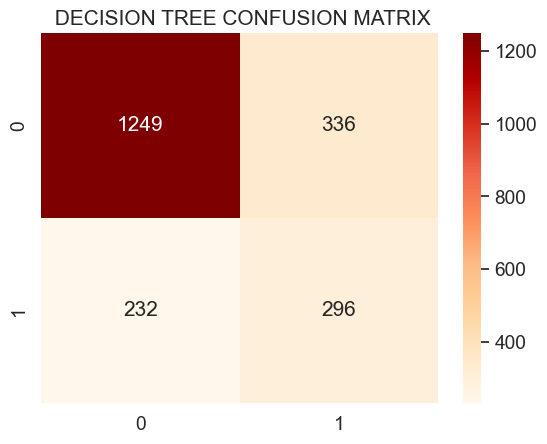

In [53]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d",cmap='OrRd')
plt.title(" DECISION TREE CONFUSION MATRIX");

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1585
           1       0.47      0.56      0.51       528

    accuracy                           0.73      2113
   macro avg       0.66      0.67      0.66      2113
weighted avg       0.75      0.73      0.74      2113



#### Random Forest

In [55]:
model = make_pipeline(StandardScaler(), RandomForestClassifier())
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test,y_test)
print("Random forest accuracy :",accuracy)
#dump(model, 'random_forest_model.pk')

Random forest accuracy : 0.7988641741599621


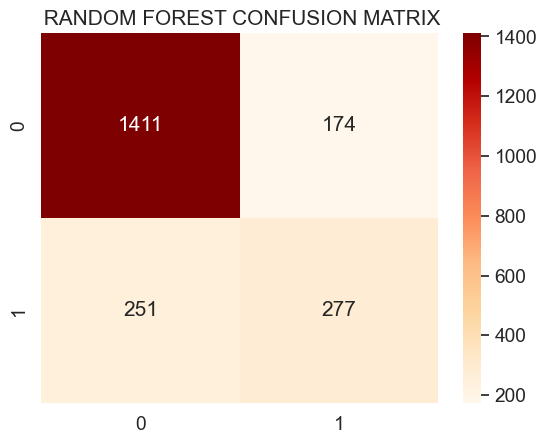

In [56]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d",cmap='OrRd')
plt.title(" RANDOM FOREST CONFUSION MATRIX");

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1585
           1       0.61      0.52      0.57       528

    accuracy                           0.80      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



#### K-Nearest Neighbors

In [58]:
model = make_pipeline(StandardScaler(),KNeighborsClassifier())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("K-Nearest Neighbors accuracy: ", accuracy)
#dump(model, 'Knn_model.pk')

K-Nearest Neighbors accuracy:  0.7619498343587316


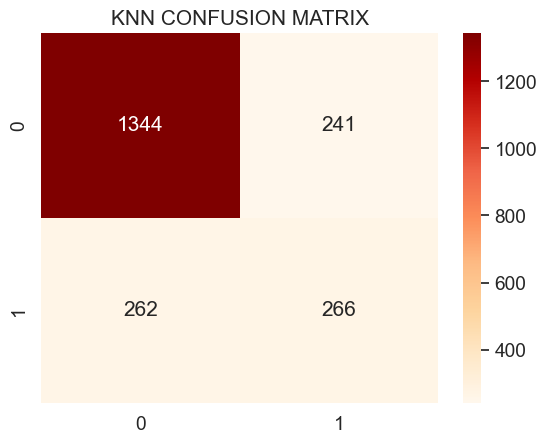

In [59]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d",cmap='OrRd')
plt.title("KNN CONFUSION MATRIX");

In [60]:
print("classification_report")
print(classification_report(y_test, y_pred))

classification_report
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1585
           1       0.52      0.50      0.51       528

    accuracy                           0.76      2113
   macro avg       0.68      0.68      0.68      2113
weighted avg       0.76      0.76      0.76      2113



#### AdaBoost Classifier

In [61]:
model = make_pipeline(StandardScaler(), AdaBoostClassifier())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("AdaBoost Classifier accuracy :",accuracy)
#dump(model, 'AdaBoost_Classifier_model.pk')

AdaBoost Classifier accuracy : 0.8121154756270705


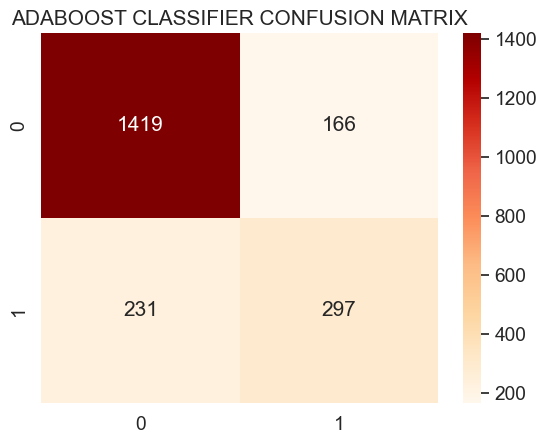

In [62]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d",cmap='OrRd')
plt.title("ADABOOST CLASSIFIER CONFUSION MATRIX");

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1585
           1       0.64      0.56      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.81      0.81      0.81      2113



#### Gradient Boosting Classifier

In [71]:
model1 = make_pipeline(StandardScaler(), GradientBoostingClassifier())
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, y_pred))
#dump(model1, 'model/churn.jb'
import pickle
import joblib
filename = 'churn.sav'
joblib.dump(model1, filename)
loaded_model = pickle.load(open(filename, 'rb'))

Gradient Boosting Classifier 0.8106956933270232


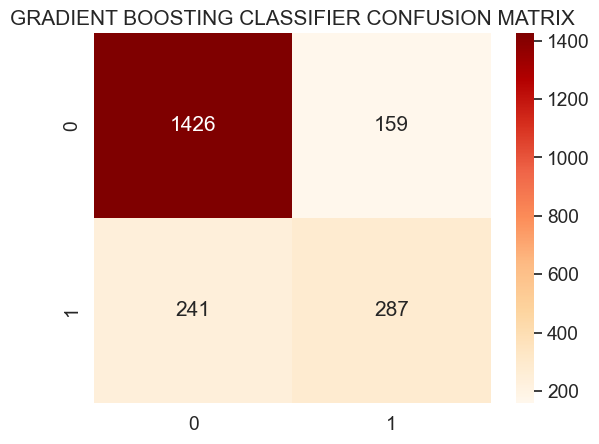

In [65]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True, fmt = "d",cmap='OrRd')
plt.title("GRADIENT BOOSTING CLASSIFIER CONFUSION MATRIX");

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1585
           1       0.64      0.54      0.59       528

    accuracy                           0.81      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.81      0.81      2113



#### Extra Tree Classifier

In [67]:
model = make_pipeline(StandardScaler(), ExtraTreesClassifier())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Extra Trees Classifier Score :", accuracy_score(y_test, y_pred))
#dump(model, 'extra_tree_model.pk')

Extra Trees Classifier Score : 0.7889256980596309


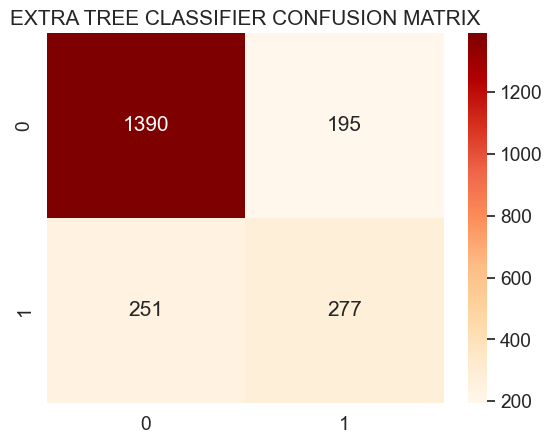

In [68]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("EXTRA TREE CLASSIFIER CONFUSION MATRIX");

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1585
           1       0.59      0.52      0.55       528

    accuracy                           0.79      2113
   macro avg       0.72      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113

